## WeatherPy
## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started cod

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    
        # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
                # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | mangrol
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | luanda
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | barra de santo antonio
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | karasburg
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | bena
Processing Record 14 of Set 1 | kelaat mgouna
City not found. Skipping...
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | gobabis
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | yuzhno-kurilsk
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 |

Processing Record 39 of Set 4 | 'izbat al burj
City not found. Skipping...
Processing Record 40 of Set 4 | jayapura
Processing Record 41 of Set 4 | saipan
Processing Record 42 of Set 4 | xilin hot
Processing Record 43 of Set 4 | bousso
Processing Record 44 of Set 4 | lata
Processing Record 45 of Set 4 | pacasmayo
Processing Record 46 of Set 4 | nemuro
Processing Record 47 of Set 4 | iskateley
Processing Record 48 of Set 4 | kabare
Processing Record 49 of Set 4 | tazovsky
Processing Record 0 of Set 5 | egilsstadir
Processing Record 1 of Set 5 | yanam
Processing Record 2 of Set 5 | ainaro
Processing Record 3 of Set 5 | novoukrayinka
Processing Record 4 of Set 5 | al ghayzah
Processing Record 5 of Set 5 | puerto maldonado
Processing Record 6 of Set 5 | pompeia
Processing Record 7 of Set 5 | tolanaro
Processing Record 8 of Set 5 | mongo
Processing Record 9 of Set 5 | tosno
Processing Record 10 of Set 5 | arraial do cabo
Processing Record 11 of Set 5 | nadi
Processing Record 12 of Set 5 | p

Processing Record 34 of Set 8 | sur
Processing Record 35 of Set 8 | santiago de cuba
Processing Record 36 of Set 8 | tortoli
Processing Record 37 of Set 8 | arar
Processing Record 38 of Set 8 | namibe
Processing Record 39 of Set 8 | hihifo
City not found. Skipping...
Processing Record 40 of Set 8 | nar'yan-mar
Processing Record 41 of Set 8 | kondoa
Processing Record 42 of Set 8 | aquidauana
Processing Record 43 of Set 8 | north platte
Processing Record 44 of Set 8 | susuman
Processing Record 45 of Set 8 | suwayr
Processing Record 46 of Set 8 | kingscliff
Processing Record 47 of Set 8 | merizo village
Processing Record 48 of Set 8 | jabor
Processing Record 49 of Set 8 | kurchatov
Processing Record 0 of Set 9 | queenstown
Processing Record 1 of Set 9 | kananga
Processing Record 2 of Set 9 | visakhapatnam
Processing Record 3 of Set 9 | general mosconi
Processing Record 4 of Set 9 | kayanza
Processing Record 5 of Set 9 | kuchera
Processing Record 6 of Set 9 | zabaykal'sk
Processing Record 

Processing Record 22 of Set 12 | vega de alatorre
Processing Record 23 of Set 12 | turka
Processing Record 24 of Set 12 | kalianget
Processing Record 25 of Set 12 | sao geraldo do araguaia
Processing Record 26 of Set 12 | coahuayana de hidalgo
Processing Record 27 of Set 12 | garachico
Processing Record 28 of Set 12 | ziro
Processing Record 29 of Set 12 | nikolayevsk-on-amure
Processing Record 30 of Set 12 | gaspe
Processing Record 31 of Set 12 | toga village
City not found. Skipping...
Processing Record 32 of Set 12 | we
City not found. Skipping...
Processing Record 33 of Set 12 | dongtai
Processing Record 34 of Set 12 | taskopru
Processing Record 35 of Set 12 | mirnyy
Processing Record 36 of Set 12 | tanki leendert
City not found. Skipping...
Processing Record 37 of Set 12 | pailon
Processing Record 38 of Set 12 | quepos
Processing Record 39 of Set 12 | tazacorte
Processing Record 40 of Set 12 | gore
Processing Record 41 of Set 12 | tezu
Processing Record 42 of Set 12 | puerto colomb

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,284.57,80,27,2.29,NZ,2023-06-13 02:33:54
1,mangrol,21.1167,70.1167,302.39,82,100,14.07,IN,2023-06-13 02:36:11
2,puerto natales,-51.7236,-72.4875,275.12,94,100,1.88,CL,2023-06-13 02:33:53
3,luanda,-8.8368,13.2343,296.15,83,75,1.03,AO,2023-06-13 02:36:11
4,jamestown,42.0970,-79.2353,286.92,79,100,4.12,US,2023-06-13 02:33:51


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,284.57,80,27,2.29,NZ,2023-06-13 02:33:54
1,mangrol,21.1167,70.1167,302.39,82,100,14.07,IN,2023-06-13 02:36:11
2,puerto natales,-51.7236,-72.4875,275.12,94,100,1.88,CL,2023-06-13 02:33:53
3,luanda,-8.8368,13.2343,296.15,83,75,1.03,AO,2023-06-13 02:36:11
4,jamestown,42.0970,-79.2353,286.92,79,100,4.12,US,2023-06-13 02:33:51


## Create the Scatter Plots Requested
### Latitude Vs. Temperature

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [9]:
# Get today's date in seconds.
today = time.time()
today

1686623831.9728868

In [10]:
# Use string format method to reformat the datetime stamp.
today = time.strftime("%x")
today

'06/12/23'

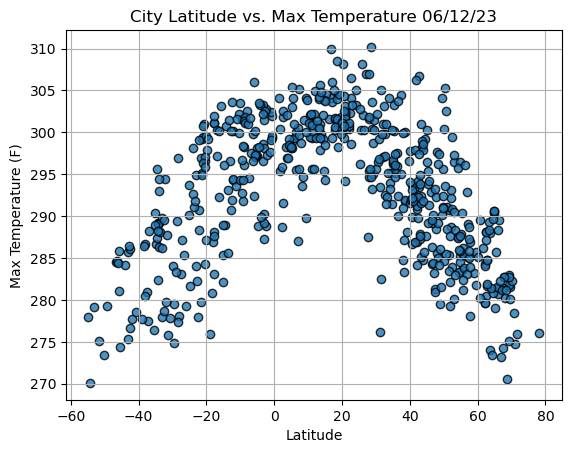

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("output_data/Fig1.png")

# Show plot.
plt.show()

### Latitude Vs. Humidity

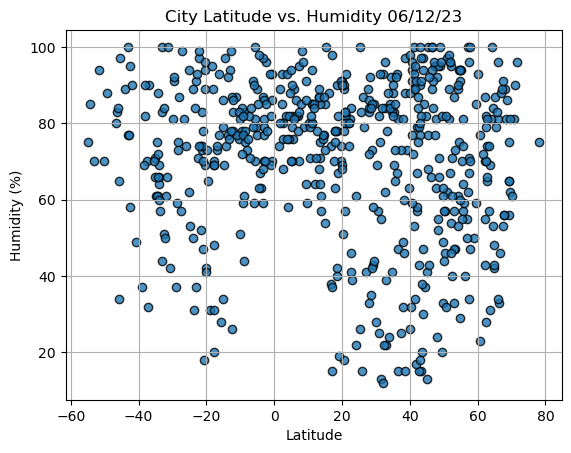

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("output_data/Fig2.png")
# Show plot.
plt.show()

### Latitude Vs. Cloudiness

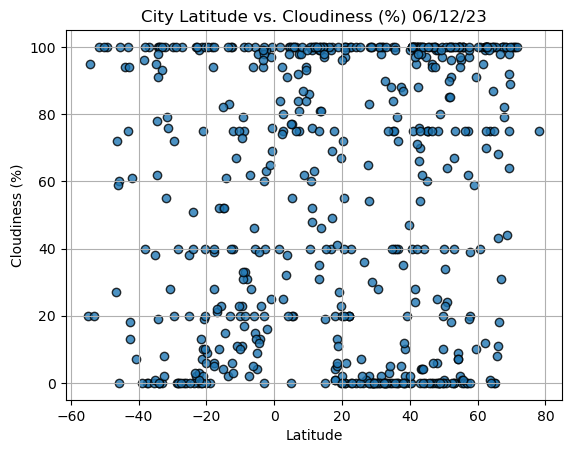

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("output_data/Fig3.png")
# Show plot.
plt.show()

### Latitude vs. Wind Speed Plot

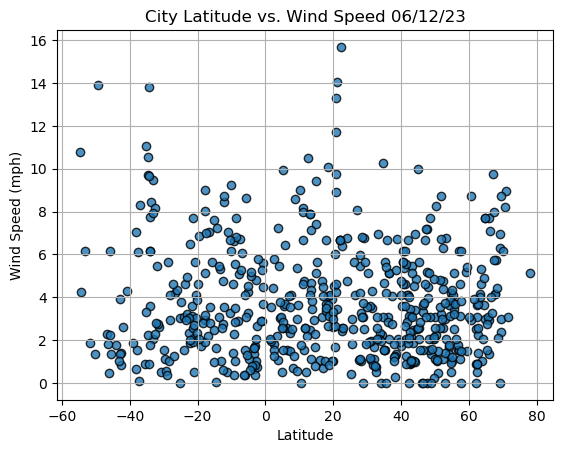

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("output_data/Fig4.png")

# Show plot.
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = slope * x_values + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Calculate the y-value and r-value
    r = r_value
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, color='red', label='Linear Regression')
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(f"r-value: {r:.2f}", (text_coordinates[0], text_coordinates[1] - 20), fontsize=12, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mangrol,21.1167,70.1167,302.39,82,100,14.07,IN,2023-06-13 02:36:11
4,jamestown,42.0970,-79.2353,286.92,79,100,4.12,US,2023-06-13 02:33:51
12,bena,11.2844,5.9347,295.59,85,76,1.52,NG,2023-06-13 02:36:12
13,wailua homesteads,22.0669,-159.3780,300.39,80,20,6.69,US,2023-06-13 02:33:49
15,iqaluit,63.7506,-68.5145,274.00,69,75,4.63,CA,2023-06-13 02:29:24


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,284.57,80,27,2.29,NZ,2023-06-13 02:33:54
2,puerto natales,-51.7236,-72.4875,275.12,94,100,1.88,CL,2023-06-13 02:33:53
3,luanda,-8.8368,13.2343,296.15,83,75,1.03,AO,2023-06-13 02:36:11
5,barra de santo antonio,-9.4047,-35.5072,296.75,84,23,4.63,BR,2023-06-13 02:36:11
6,hermanus,-34.4187,19.2345,289.15,88,100,13.84,ZA,2023-06-13 02:33:52


### Temperature vs. Latitude Linear Regression Plot

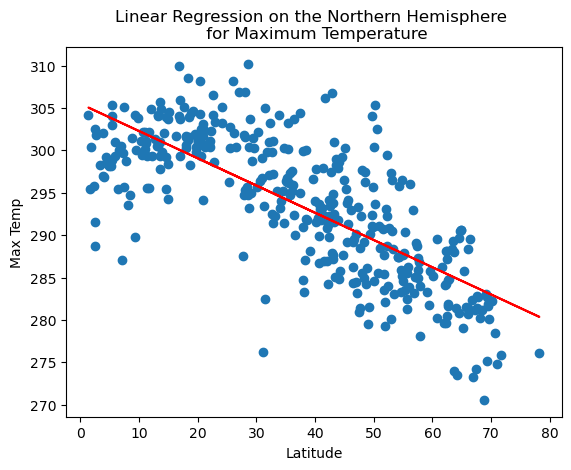

<function matplotlib.pyplot.show(close=None, block=None)>

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(35,70))


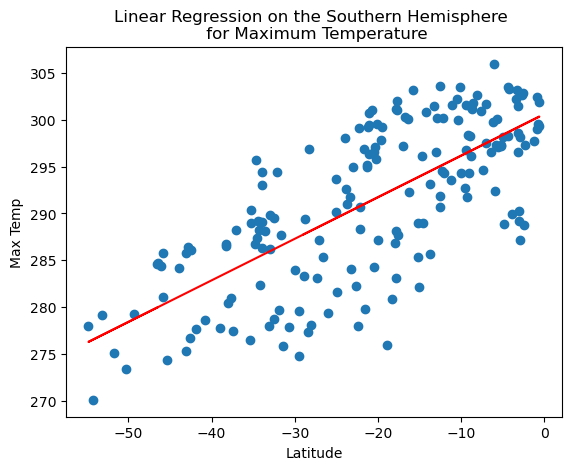

<function matplotlib.pyplot.show(close=None, block=None)>

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# Show the figure.
plt.show

### Humidity vs. Latitude Linear Regression Plot

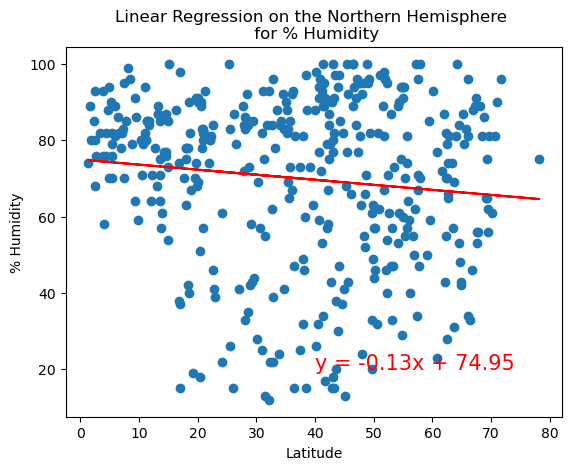

<function matplotlib.pyplot.show(close=None, block=None)>

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

# Show the figure.
plt.show

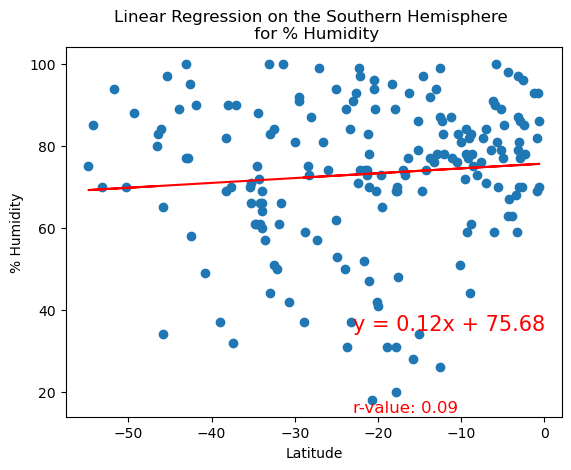

<function matplotlib.pyplot.show(close=None, block=None)>

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-23,35))

# Show the figure.
plt.show

### Cloudiness vs. Latitude Linear Regression Plot

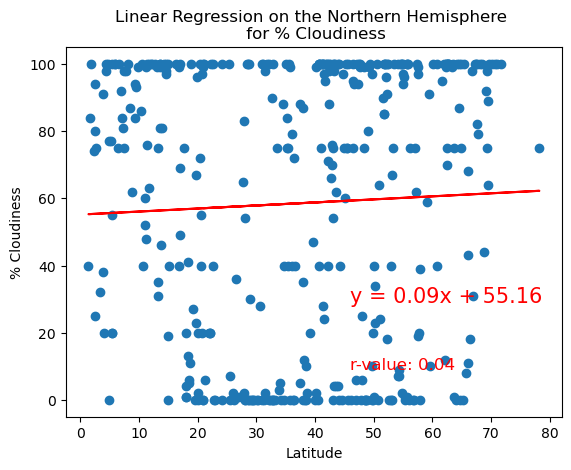

<function matplotlib.pyplot.show(close=None, block=None)>

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(46,29))

# Show the figure.
plt.show

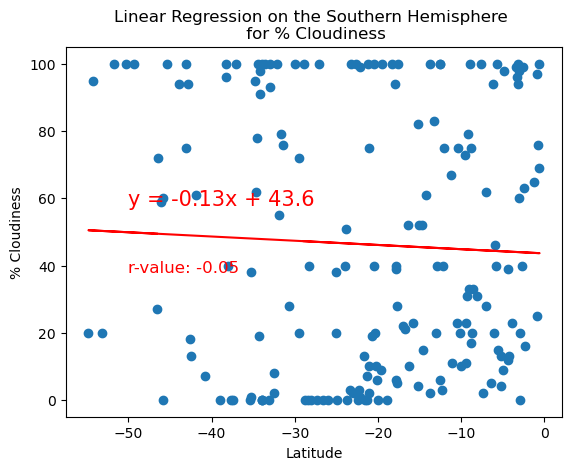

<function matplotlib.pyplot.show(close=None, block=None)>

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,58))

# Show the figure.
plt.show

### Wind Speed vs. Latitude Linear Regression Plot

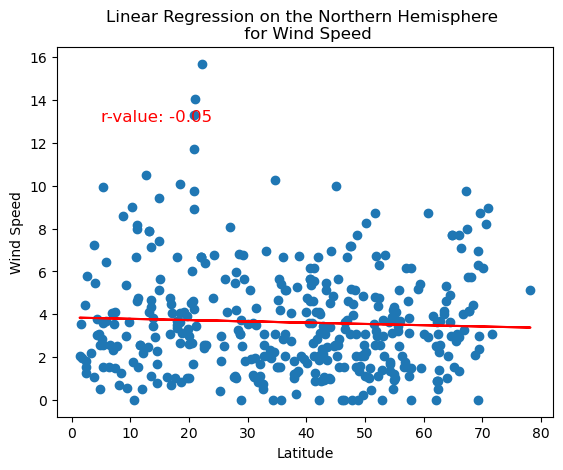

<function matplotlib.pyplot.show(close=None, block=None)>

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,33))

# Show the figure.
plt.show

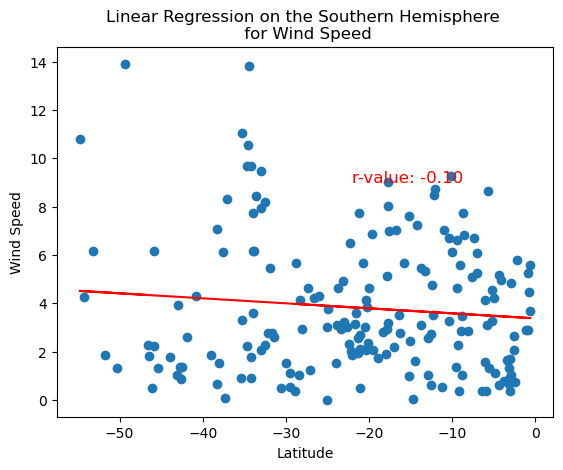

<function matplotlib.pyplot.show(close=None, block=None)>

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-22,29))

# Show the figure.
plt.show